In [1]:
import pandas as pdas  # CSV files In/Output, data processing (e.g. pdas.read_csv)
import numpy as npy  # Evaluating mathematical lib, linear algebra
import matplotlib.pyplot as matplot_plt  # Draw chart lib
import plotly.express as plotly_ex  # Draw chart lib

# For Saving best model
import joblib

In [2]:
# Auto detect-width to set data to fit the width of the terminal
pdas.set_option("display.max_columns", None)
# Input the dataset
dts_dtframe = pdas.read_csv("../data/churn.csv")

In [3]:
# Get overview of the data
def dataoveriew(dataframe, message):
    print(f"{message}:")
    print("Tổng số hàng: ", dataframe.shape[0])
    print("Tổng số thuộc tính:", dataframe.shape[1])
    print("Các thuộc tính:")
    print(dataframe.columns.tolist())
    print("Số kiểu giá trị của từng thuộc tính:")
    print(dataframe.nunique())
    print("Giá trị null:", dataframe.isnull().sum().values.sum())


dataoveriew(dts_dtframe, "Tổng quan về dataset:")

Tổng quan về dataset::
Tổng số hàng:  7043
Tổng số thuộc tính: 21
Các thuộc tính:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Số kiểu giá trị của từng thuộc tính:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64
Giá trị null: 0


### Tổng quan tệp dữ liệu

In [4]:
# Trả về Object với giá trị giảm dần của các thuộc tính
churn_instance = dts_dtframe["Churn"].value_counts()
# Chuyển đổi series, object thành DataFrame
churn_instance = churn_instance.to_frame()
# Reset index cho DataFrame
churn_instance = churn_instance.reset_index()
# Đặt lại tên cho cột 'index'
churn_instance = churn_instance.rename(columns={"index": "Category"})
# Sử dụng thư viện plotly.express để vẽ sơ đồ
churn_pie_chart = plotly_ex.pie(
    churn_instance,
    values="Churn",
    names="Category",
    color_discrete_sequence=["blue", "red"],
    title="Phân bổ tỉ lệ Churn",
    width=800
)
churn_pie_chart.show()

### Bar Chart:

In [5]:
# Bar chart function
def bar_chart(feature, dtframe=dts_dtframe):
    # Nhóm dataframe theo các thuộc tính
    temp_dtframe = dtframe.groupby([feature, "Churn"])
    temp_dtframe = temp_dtframe.size()
    temp_dtframe = temp_dtframe.reset_index()
    temp_dtframe = temp_dtframe.rename(columns={0: "Count"})
    # Tính tổng số lượng của mỗi giá trị
    value_counts_dtframe = dtframe[feature].value_counts()
    value_counts_dtframe = value_counts_dtframe.to_frame()
    value_counts_dtframe = value_counts_dtframe.reset_index()
    features = [fea[1][0] for fea in value_counts_dtframe.iterrows()]
    # Tính tỉ lệ % ứng với mỗi giá trị
    count_list = [numb[1][1] for numb in value_counts_dtframe.iterrows()]
    divide_list = [element / sum(count_list) for element in count_list]
    percentage_rate = [round(element * 100, 1) for element in divide_list]

    # Thiết lập chú thích 
    def number_format(list_instance):
        formatted_str = ""
        for index, num in enumerate(list_instance):
            if index < len(list_instance) - 2:
                formatted_str = (
                    formatted_str + f"{num}%, "
                )
            elif index == len(list_instance) - 2:
                formatted_str = formatted_str + f"{num}% & "
            else:
                formatted_str = formatted_str + f"{num}%"
        return formatted_str

    def string_format(list_instance):
        formatted_str = ""
        for index, cat in enumerate(list_instance):
            if index < len(list_instance) - 2:
                formatted_str = formatted_str + f"{cat}, "
            elif index == len(list_instance) - 2:
                formatted_str = formatted_str + f"{cat} & "
            else:
                formatted_str = formatted_str + f"{cat}"
        return formatted_str

    number_str = number_format(percentage_rate)
    feature_str = string_format(features)

    # Cấu hình đồ thị
    chart = plotly_ex.bar(
        temp_dtframe,
        x=feature,
        y="Count",
        color="Churn",
        title=f"Tỉ lệ Churn theo {feature}",
        barmode="group",
        color_discrete_sequence=["blue", "red"],
        width=900
    )
    chart.add_annotation(
        text=f"Tỉ lệ % các giá trị {feature_str}<br>lần lượt là: {number_str}.",
        align="left",
        showarrow=False,
        xref="paper",
        yref="paper",
        x=1,
        y=1.15,
        bordercolor="black",
        borderwidth=1,
    )

    return chart.show()

In [6]:
bar_chart("gender")
dts_dtframe.loc[
    dts_dtframe.SeniorCitizen == 0, "SeniorCitizen"
] = "No"
dts_dtframe.loc[
    dts_dtframe.SeniorCitizen == 1, "SeniorCitizen"
] = "Yes"
bar_chart("SeniorCitizen")
bar_chart("Partner")
bar_chart("Dependents")

In [7]:
bar_chart("PhoneService")
bar_chart("MultipleLines")
bar_chart("InternetService")
bar_chart("OnlineSecurity")
bar_chart("OnlineBackup")
bar_chart("DeviceProtection")
bar_chart("TechSupport")
bar_chart("StreamingTV")
bar_chart("StreamingMovies")

In [8]:
bar_chart("Contract")
bar_chart("PaperlessBilling")
bar_chart("PaymentMethod")

### Histogram chart

In [9]:
dts_dtframe.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
try:
    dts_dtframe["TotalCharges"] = dts_dtframe["TotalCharges"].astype(float)
except ValueError as value_err:
    print(value_err)

could not convert string to float: ''


In [11]:
dts_dtframe["TotalCharges"] = pdas.to_numeric(
    dts_dtframe["TotalCharges"], errors="coerce"
)
# Thay thế các giá trị trống bằng giá trị trung bình
dts_dtframe["TotalCharges"] = dts_dtframe["TotalCharges"].fillna(
    dts_dtframe["TotalCharges"].median()
)

In [12]:
# Histogram plotting function
def histogram_chart(feature):
    group_dtframe = dts_dtframe.groupby([feature, "Churn"])
    group_dtframe = group_dtframe.size()
    group_dtframe = group_dtframe.reset_index()
    group_dtframe = group_dtframe.rename(columns={0: "Count"})
    hist_chart = plotly_ex.histogram(
        group_dtframe,
        x=feature,
        y="Count",
        color="Churn",
        marginal="box",
        title=f"Tỉ lệ Churn theo {feature}",
        color_discrete_sequence=["blue", "red"],
        width=900
    )
    hist_chart.show()

In [13]:
histogram_chart("tenure")
histogram_chart("MonthlyCharges")
histogram_chart("TotalCharges")

In [14]:
# Phân loại thành 3 trường giá trị: low, medium, high
bin_dtframe = pdas.DataFrame()

bin_dtframe["tenure_bins"] = pdas.qcut(
    dts_dtframe["tenure"], q=3, labels=["low", "medium", "high"]
)
bin_dtframe["MonthlyCharges_bins"] = pdas.qcut(
    dts_dtframe["MonthlyCharges"], q=3, labels=["low", "medium", "high"]
)
bin_dtframe["TotalCharges_bins"] = pdas.qcut(
    dts_dtframe["TotalCharges"], q=3, labels=["low", "medium", "high"]
)
bin_dtframe["Churn"] = dts_dtframe["Churn"]

bar_chart("tenure_bins", bin_dtframe)
bar_chart("MonthlyCharges_bins", bin_dtframe)
bar_chart("TotalCharges_bins", bin_dtframe)

### Data preprocessing

In [15]:
# Loại bỏ các thuộc tính không cần thiết.
dts_dtframe.drop(["customerID"], axis=1, inplace=True)

# Chuẩn hoá dữ liệu, đưa về các giá trị nhị phân
def binary_map(feature):
    return feature.map({"Yes": 1, "No": 0})

dts_dtframe["Churn"] = dts_dtframe[["Churn"]].apply(binary_map)
dts_dtframe["gender"] = dts_dtframe["gender"].map({"Male": 1, "Female": 0})
binary_list = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
]
dts_dtframe[binary_list] = dts_dtframe[binary_list].apply(binary_map)

# Chuẩn hoá các thuộc tính có nhiều hơn 2 loại giá trị
dts_dtframe = pdas.get_dummies(dts_dtframe, drop_first=True)

In [16]:
# Kiểm tra mức độ tương quan giữa các thuộc tính
corr_temp = dts_dtframe.corr()

matrix_chart = plotly_ex.imshow(corr_temp, width=1000, height=1000)
matrix_chart.show()

In [17]:
import statsmodels.api as sm_api
import statsmodels.formula.api as sm_f_api

# Thay thế các kí tự đặc biệt bằng kí tự '_'
all_columns = [
    column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")
    for column in dts_dtframe.columns
]
dts_dtframe.columns = all_columns

# Áp dụng Generalized Linear Model
glm_columns = [col for col in all_columns if col not in ["customerID", "Churn"]]
glm_columns = " + ".join(map(str, glm_columns))
glm_model = sm_f_api.glm(
    formula=f"Churn ~ {glm_columns}",
    data=dts_dtframe,
    family=sm_api.families.Binomial(),
)
result = glm_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Wed, 01 Dec 2021   Deviance:                       5829.3
Time:                        00:58:36   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2807
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [18]:
# Sử dụng hệ số mũ để thu được thông số rõ ràng
npy.exp(result.params)

Intercept                                2.287343
gender                                   0.978355
SeniorCitizen                            1.239957
Partner                                  0.997312
Dependents                               0.857471
tenure                                   0.942322
PhoneService                             1.654668
PaperlessBilling                         1.407543
MonthlyCharges                           0.960432
TotalCharges                             1.000318
MultipleLines_No_phone_service           1.382358
MultipleLines_Yes                        1.563475
InternetService_Fiber_optic              5.771657
InternetService_No                       0.774257
OnlineSecurity_No_internet_service       0.774257
OnlineSecurity_Yes                       0.814269
OnlineBackup_No_internet_service         0.774257
OnlineBackup_Yes                         1.026127
DeviceProtection_No_internet_service     0.774257
DeviceProtection_Yes                     1.159152


In [19]:
# Sử dụng MixMaxScaler để chuẩn hoá dữ liệu
from sklearn.preprocessing import MinMaxScaler

scale_dt = MinMaxScaler()
dts_dtframe["tenure"] = scale_dt.fit_transform(dts_dtframe[["tenure"]])
dts_dtframe["MonthlyCharges"] = scale_dt.fit_transform(dts_dtframe[["MonthlyCharges"]])
dts_dtframe["TotalCharges"] = scale_dt.fit_transform(dts_dtframe[["TotalCharges"]])

#### Training model

In [20]:
# Huấn luyện model với các thuật toán học máy phân loại
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Chia tập dữ liệu thành 2 bộ:
# Bộ dữ liệu huấn luyện và bộ dữ liệu kiểm thử
from sklearn.model_selection import train_test_split

X = dts_dtframe.drop("Churn", axis=1)
y = dts_dtframe["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50
)  

In [21]:
def train_model(alg, alg_name, params={}):
    model = alg(
        **params
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    def algorithm_scores(alg, y_true, y_pred):
        acc_score = accuracy_score(y_true, y_pred)
        pre_score = precision_score(y_true, y_pred)
        rec_score = recall_score(y_true, y_pred)
        f_score = f1_score(y_true, y_pred, average="weighted")
        print(alg_name)
        print("accuracy: ", acc_score)
        print("precision: ", pre_score)
        print("recall: ", rec_score)
        print("f1_score: ", f_score)

    algorithm_scores(alg, y_test, y_pred)
    return model

In [22]:
# Logistic regression model
logistic_reg_model = train_model(
    LogisticRegression, 
    "Logistic Regression"
)

Logistic Regression
accuracy:  0.7983909133932797
precision:  0.6281800391389433
recall:  0.5763016157989228
f1_score:  0.7955174819104321


In [23]:
# Tối ưu hoá tập thuộc tính sử dụng để build model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

logisticReg = LogisticRegression()
rfecv_temp = RFECV(
    estimator=logisticReg,
    cv=StratifiedKFold(
        10,
        random_state=50, 
        shuffle=True
    ),
    scoring="accuracy",
)
rfecv_temp.fit(X, y)

C:\Users\Thinh_Me\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RFECV was fitted with feature names



RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

C:\Users\Thinh_Me\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



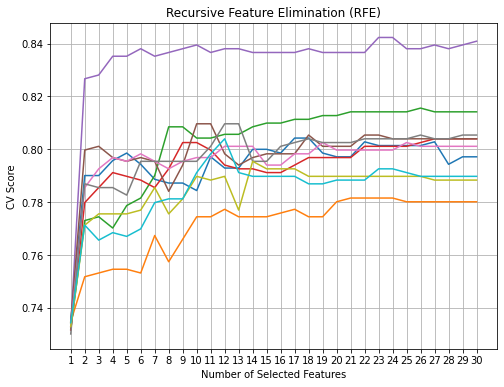

Số lượng tối ưu các thuộc tính: 23


In [24]:
matplot_plt.figure(figsize=(8, 6))
matplot_plt.plot(range(1, len(rfecv_temp.grid_scores_) + 1), rfecv_temp.grid_scores_)
matplot_plt.grid()
matplot_plt.xticks(range(1, X.shape[1] + 1))
matplot_plt.xlabel("Number of Selected Features")
matplot_plt.ylabel("CV Score")
matplot_plt.title("Recursive Feature Elimination (RFE)")
matplot_plt.show()

print("Số lượng tối ưu các thuộc tính: {}".format(rfecv_temp.n_features_))

In [25]:
# Lưu DataFrame với optimal features
X_rfe = X.iloc[:, rfecv_temp.support_]

# So sánh tổng quan optimal features với intial DataFrame
print('"X" dimension: {}'.format(X.shape))
print('"X" column list:', X.columns.tolist())
print('"X_rfe" dimension: {}'.format(X_rfe.shape))
print('"X_rfe" column list:', X_rfe.columns.tolist())

"X" dimension: (7043, 30)
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
"X_rfe" dimension: (7043, 23)
"X_rfe" column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', '

In [26]:
# Phân bổ dữ liệu theo optimal features
X_train, X_test, y_train, y_test = train_test_split(
    X_rfe, y, test_size=0.3, random_state=50
) 

In [27]:
# Running logistic regression model
logistic_reg_model = train_model(
    LogisticRegression, 
    "Logistic Regression"
)

Logistic Regression
accuracy:  0.8017037387600567
precision:  0.6374501992031872
recall:  0.5745062836624776
f1_score:  0.7982762676502377


In [28]:
# SVC
svc_model = train_model(SVC, "SVC Classification")

SVC Classification
accuracy:  0.7993374349266446
precision:  0.6494382022471911
recall:  0.518850987432675
f1_score:  0.7916082146150322


In [29]:
# Random forest
random_forest_model = train_model(
    RandomForestClassifier, 
    "Random Forest"
)

Random Forest
accuracy:  0.7832465688594415
precision:  0.6029106029106029
recall:  0.5206463195691203
f1_score:  0.777895107779421


In [30]:
# Decision tree
decision_tree_model = train_model(
    DecisionTreeClassifier, 
    "Decision Tree"
)

Decision Tree
accuracy:  0.7302413629910081
precision:  0.4891846921797005
recall:  0.5278276481149012
f1_score:  0.7334319272216754


In [31]:
# Naive bayes
naive_bayes_model = train_model(GaussianNB, "Naive Bayes")

Naive Bayes
accuracy:  0.6540463795551349
precision:  0.4257679180887372
recall:  0.895870736086176
f1_score:  0.6729702812977834


In [32]:
# Cải thiện model sử dụng kĩ thuật hyperparameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space["solver"] = ["newton-cg", "lbfgs", "liblinear"]
space["penalty"] = ["none", "l1", "l2", "elasticnet"]
space["C"] = loguniform(1e-5, 1000)

search = RandomizedSearchCV(
    model, space, n_iter=500, scoring="accuracy", n_jobs=-1, cv=cv, random_state=1
)

result = search.fit(X_rfe, y)
# Kết quả
print("Best Score: %s" % result.best_score_)
print("Best Hyperparameters: %s" % result.best_params_)

Best Score: 0.8045796394799054
Best Hyperparameters: {'C': 105.95953102146511, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Thinh_Me\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Thinh_Me\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Thinh_Me\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Thinh_Me\AppData\Lo

In [33]:
params = result.best_params_
params

{'C': 105.95953102146511, 'penalty': 'l2', 'solver': 'liblinear'}

In [34]:
# Cải thiện the Logistic Regression model
logistic_reg_model = train_model(
    LogisticRegression, "Logistic Regression", 
    params=params
)

Logistic Regression
accuracy:  0.8031235210601041
precision:  0.6407185628742516
recall:  0.5763016157989228
f1_score:  0.7996532493520713


In [35]:
# Lưu model để sử dụng
model_file = "model.sav"
joblib.dump(logistic_reg_model, model_file)

['model.sav']